## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

# 1 Import the dataset (Housing.csv) and look at the top five rows

In [48]:
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 2 Check the shape of the DataFrame (rows, columns)

In [49]:
print(df.shape)

(545, 13)


# 3 Look at the data types of the columns

In [50]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# 4 Check for missing  values if any, replace with appropriate values

In [51]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# 5 Prepare  X (independent variables) and y (dependent variable)

In [52]:
y = df['price']
X = df.drop(columns=['price'])
df['stories'].max()

4

# 6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

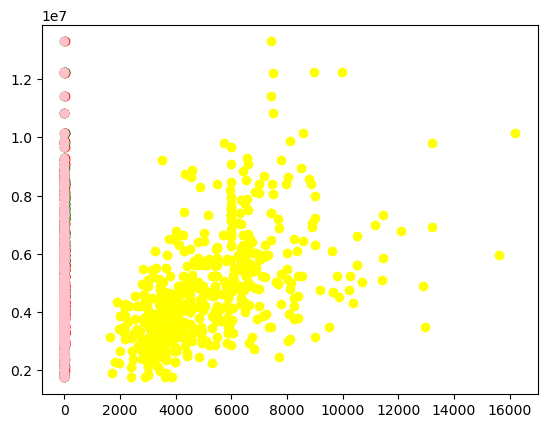

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X['area'],y,color='yellow')
plt.scatter(X['bedrooms'],y,color='red')
plt.scatter(X['stories'],y,color='green')
plt.scatter(X['parking'],y,color='pink')
#plt.scatter(X['mainroad'],y,color='blue')
plt.show()

# 8  Avoiding the Dummy Variable Trap

In [54]:
dummy_df = pd.get_dummies(df)
dummy_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


# 7 Encoding categorical data in X

In [55]:
catego = df.select_dtypes(include=['object']).columns
catego

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
clf = LabelEncoder()
for cols in catego:
    df[cols] = clf.fit_transform(df[cols])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# 9 Apply feature scaling on numerical variables

In [57]:
from sklearn.preprocessing import StandardScaler
clf = StandardScaler()
fitting = clf.fit_transform(df)
df = pd.DataFrame(fitting,columns=df.columns)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


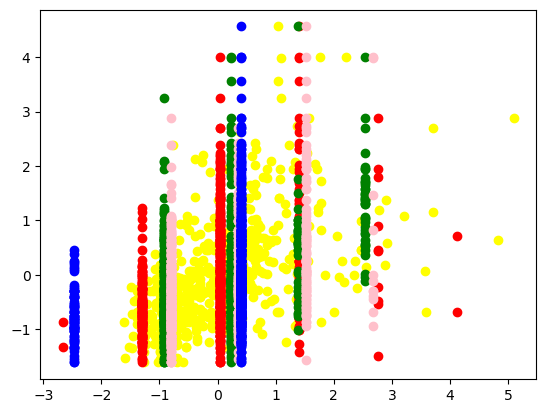

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df['area'],df['price'],color='yellow')
plt.scatter(df['bedrooms'],df['price'],color='red')
plt.scatter(df['stories'],df['price'],color='green')
plt.scatter(df['parking'],df['price'],color='pink')
plt.scatter(df['mainroad'],df['price'],color='blue')
plt.show()

# 10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

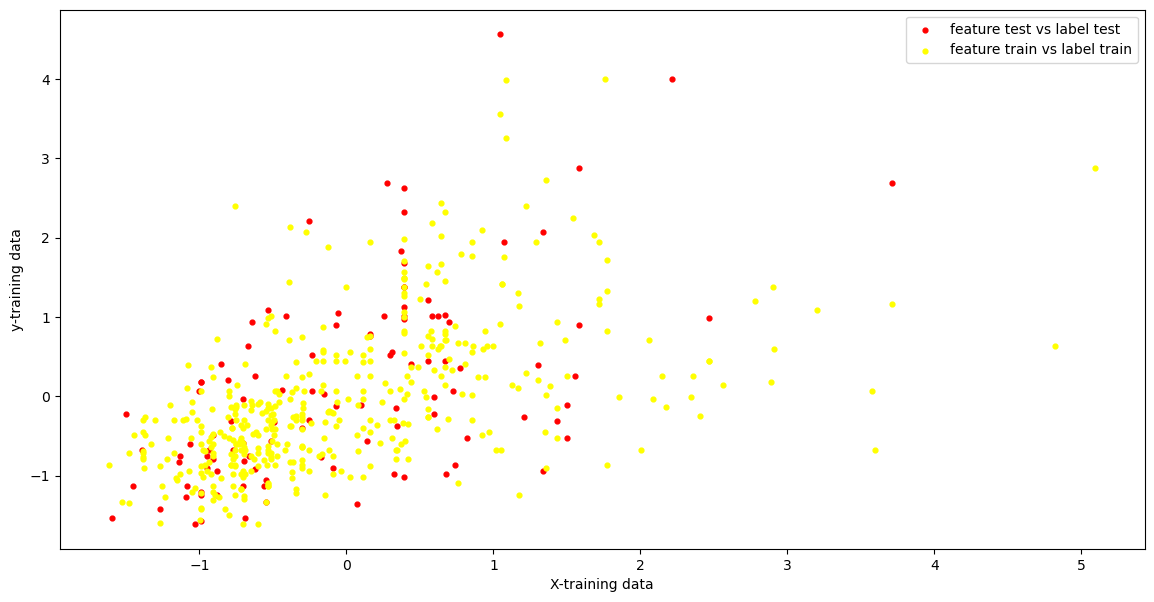

In [63]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(14,7))
plt.scatter(X_test.iloc[:, 0], y_test,color='red',s=12 ,label="feature test vs label test" )
plt.scatter(X_train.iloc[:, 0], y_train ,color='yellow' ,s=12 ,label="feature train vs label train")

plt.xlabel("X-training data")
plt.ylabel("y-training data")
plt.legend()
plt.show()

# 11 Fitting Multiple Linear Regression to the Training

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

clf = LinearRegression()

clf.fit(X_train,y_train)

LinearRegression()

# 12 Predict on the train set and calculate the error = y_pred - y_train

In [81]:
y_pred = clf.predict(X_train)

error = y_pred-y_train

print("Prediction error (y_pred - y_train): ",error)

Prediction error (y_pred - y_train):  46    -0.205404
93     0.288851
335    0.497997
412    0.317343
471    0.138508
         ...   
71    -0.097296
106    0.159603
270    1.040011
435   -0.234154
102    0.455382
Name: price, Length: 436, dtype: float64


# 13  Residual plot - plot y_pred in x axis and errors in y axis

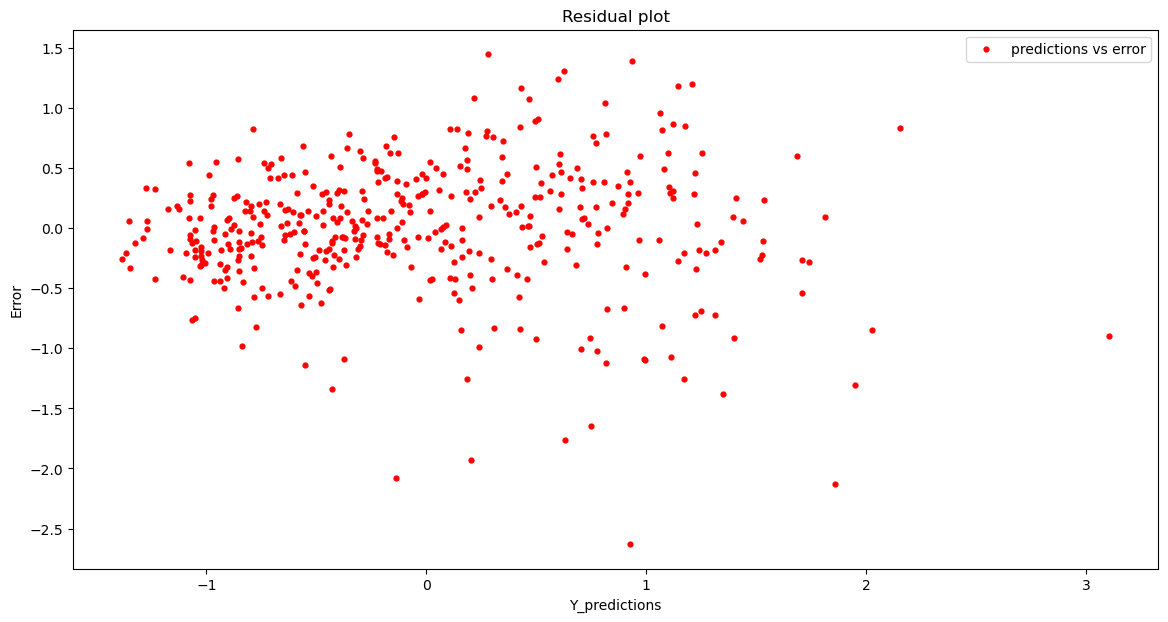

In [93]:
plt.figure(figsize=(14,7))
plt.scatter(y_pred, error,color='red',s=12 ,label="predictions vs error" )

plt.title("Residual plot")
plt.xlabel("Y_predictions")
plt.ylabel("Error")
plt.legend()
plt.show()

# 14  Predic on the test set

In [100]:
y_test_pred = clf.predict(X_test)

error_test = y_test_pred - y_test

print("Prediction error on test set (y_pred_test - y_test):",error_test)


Prediction error on test set (y_pred_test - y_test): 316    0.612018
77     0.324823
360   -0.346317
90    -1.006253
493    0.285185
         ...   
15    -2.229792
357    0.323287
39    -0.481968
54    -0.534343
155    0.470557
Name: price, Length: 109, dtype: float64


# 15 Residual plot - plot y_pred in x axis and errors in y axis

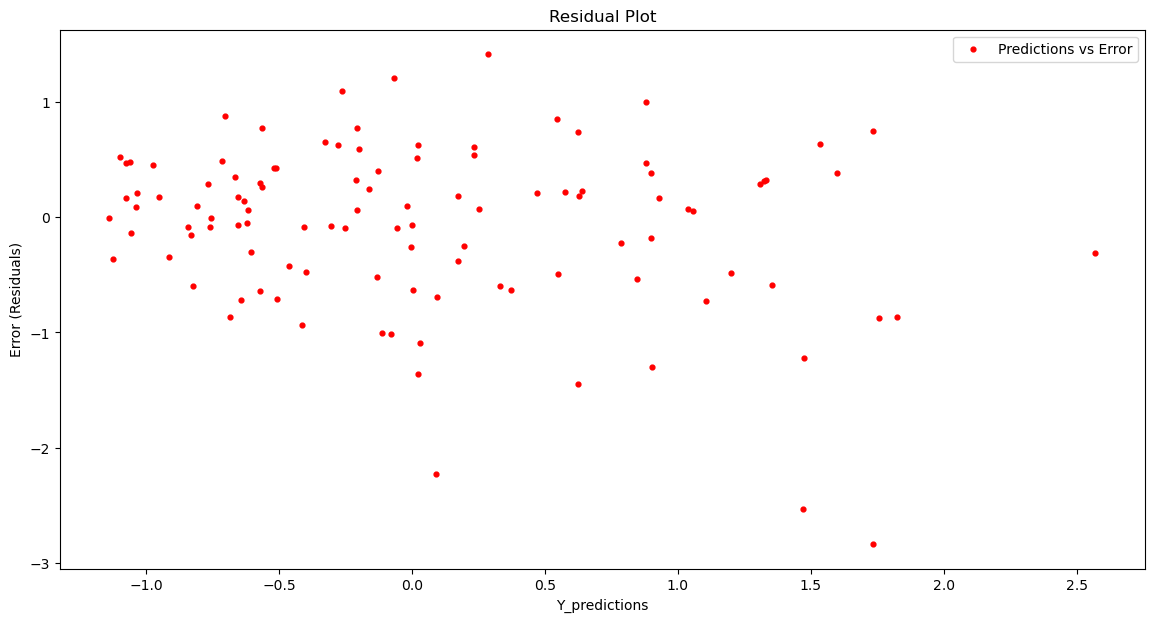

In [103]:
y_pred_test = clf.predict(X_test)

errors = y_pred_test - y_test

plt.figure(figsize=(14, 7))
plt.scatter(y_pred_test, errors, color='red', s=12, label="Predictions vs Error")

plt.title("Residual Plot")
plt.xlabel("Y_predictions")
plt.ylabel("Error (Residuals)")

plt.legend()
plt.show()


# 16 Print Mean Squared Error and R Squared Value

In [107]:
from sklearn.metrics import mean_squared_error,r2_score

predictions = clf.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)

print("Mean Squared Error : ",mse)
print("R-squared : ",r2)


Mean Squared Error :  0.507356154875056
R-squared :  0.6494754192267793


In [108]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.5242509357450869
Root Mean Squared Error (RMSE): 0.7122893757982468


# 17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)